# Content of this Notebook

This notebook will contain all the data analysis that will be included in the paper, the numbers, the graphs etc...

Its organization will follow the article structure

In [1]:
import sqlite3

scan_db_path = "../data/data.db"
scan_db = sqlite3.connect(scan_db_path, isolation_level="EXCLUSIVE")
scan_cur = scan_db.cursor()

parsed_db_path = "../data/parsed.db"
parsed_db = sqlite3.connect(parsed_db_path, isolation_level="EXCLUSIVE")
parsed_cur = parsed_db.cursor()

missmatch_db_path = "../data/missmatches.db"
missmatch_db = sqlite3.connect(missmatch_db_path, isolation_level="EXCLUSIVE")
missmatch_cur = missmatch_db.cursor()
missmatch_cur.execute(f"ATTACH DATABASE '{scan_db_path}' AS source")


In [12]:
total_entries = 156086733
total_domains =  55014675

In [2]:
%load_ext rpy2.ipython

In [3]:
%R require(ggplot2)

R[write to console]: Loading required package: ggplot2



1


# Introduction

# Background

# WHOIS vs RDAP

## Methodology

## Results

## Generic

Plot the number of missmatches and domains for each category

In [108]:
counts = {}

def count_missmatches(field):
    print(f"Counting {field} errors")
    missmatch_cur.execute(f"SELECT COUNT(*), COUNT(DISTINCT(domain)) FROM {field}")
    return missmatch_cur.fetchall()[0]

counts['registrar'] = count_missmatches('registrar')
counts['iana_id'] = count_missmatches('iana_id')
counts['nameservers'] = count_missmatches('nameservers')
counts['creation_date'] = count_missmatches('creation_date')
counts['expiration_date'] = count_missmatches('expiration_date')
counts['emails'] = count_missmatches('emails')

Counting registrar errors
Counting iana_id errors
Counting nameservers errors
Counting creation_date errors
Counting expiration_date errors
Counting emails errors


In [110]:
print("Counting the total number of domains")
scan_cur.execute("SELECT COUNT(DISTINCT(domain)) FROM parsed")
nb_doms = scan_cur.fetchall()[0][0]

Counting the total number of domains


In [111]:
import pandas as pd

nb_per_field = pd.DataFrame(counts, columns=ns=["missmatches", "domains"])
100*nb_per_field["domains"]/nb_doms

{'registrar': (64129548, 21980976),
 'iana_id': (264584, 106813),
 'nameservers': (1044268, 573790),
 'creation_date': (67056160, 23701591),
 'expiration_date': (110740985, 38066346),
 'emails': (50148892, 18958821)}

In [ ]:
missmatch_cur.execute("SELECT *"

### Plot the fault rate of each registrar

In [ ]:
import pandas as pd

sample_registrars = pd.read_sql(
    "SELECT iana_id, COUNT(DISTINCT(domain)) "
    "FROM parsed "
    "GROUP BY iana_id", scan_db)
sample_registrars

In [ ]:
creation_iana = pd.read_sql(
    "SELECT r.iana_id, COUNT(DISTINCT(creation_date.domain)) "
    "FROM creation_date "
    "JOIN source.parsed AS r ON creation_date.right_id=r.rowid "
    "GROUP BY r.iana_id", missmatch_db)
creation_iana

In [ ]:
expiration_iana = pd.read_sql(
    "SELECT r.iana_id, COUNT(DISTINCT(expiration_date.domain)) "
    "FROM expiration_date "
    "JOIN source.parsed AS r ON expiration_date.right_id=r.rowid "
    "GROUP BY r.iana_id", missmatch_db)
expiration_iana

In [97]:
update_iana = pd.read_sql(
    "SELECT r.iana_id, COUNT(DISTINCT(update_date.domain)) "
    "FROM update_date "
    "JOIN source.parsed AS r ON update_date.right_id=r.rowid "
    "GROUP BY r.iana_id", missmatch_db)
update_iana

,iana_id,COUNT(DISTINCT(update_date.domain))
0,-1,7955407
1,0,46
2,2,103834
3,9,52785
4,13,4473
...,...,...
2309,30149320,1
2310,30157399,3
2311,30696040,3
2312,30852007,2


In [ ]:
nameservers_iana = pd.read_sql(
    "SELECT r.iana_id, COUNT(DISTINCT(nameservers.domain)) "
    "FROM nameservers "
    "JOIN source.parsed AS r ON nameservers.right_id=r.rowid "
    "GROUP BY r.iana_id", missmatch_db)
nameservers_iana

In [ ]:
emails_iana = pd.read_sql(
    "SELECT r.iana_id, COUNT(DISTINCT(emails.domain)) "
    "FROM emails "
    "JOIN source.parsed AS r ON emails.right_id=r.rowid "
    "GROUP BY r.iana_id", missmatch_db)
nameservers_iana

In [65]:
sample_registrars.set_index('iana_id', inplace=True)
sample_registrars.columns = ['total']
creation_iana.set_index('iana_id', inplace=True)
creation_iana.columns = ['creation_date']
expiration_iana.set_index('iana_id', inplace=True)
expiration_iana.columns = ['expiration_date']
nameservers_iana.set_index('iana_id', inplace=True)
nameservers_iana.columns = ['nameservers']
emails_iana.set_index('iana_id', inplace=True)
emails_iana.columns = ['emails']

NameError: name 'nameservers' is not defined

In [98]:
update_iana.set_index('iana_id', inplace=True)
update_iana.columns = ['update_date']

In [99]:
faulty_registrars = pd.concat([sample_registrars, update_iana, creation_iana, expiration_iana, nameservers_iana, emails_iana], axis=1)

In [71]:
faulty_registrars.sort_values('total', ascending=False)

,total,creation_date,expiration_date,nameservers,emails
iana_id,,,,,
146,16216010,1623733.0,1474880.0,8636.0,496679.0
-1,14220406,612292.0,598229.0,379582.0,2651426.0
1068,3295682,3467.0,2058.0,1276.0,2388214.0
69,2250859,18.0,21106.0,282.0,957242.0
895,1969323,200409.0,19095.0,2.0,1477617.0
...,...,...,...,...,...
2502,1,NaN,NaN,NaN,NaN
627,1,NaN,NaN,NaN,NaN
1882,1,NaN,NaN,NaN,NaN


In [72]:
(faulty_registrars['creation_date'] / faulty_registrars['total']).sort_values(ascending=False)

iana_id
1871        0.964564
1873        0.957154
1863        0.957153
1907        0.956765
1019        0.955241
              ...   
30149320         NaN
30157399         NaN
30696040         NaN
30852007         NaN
30934604         NaN
Length: 2494, dtype: float64

In [101]:
top_faulty = faulty_registrars.sort_values('total', ascending=False).head(1000)

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


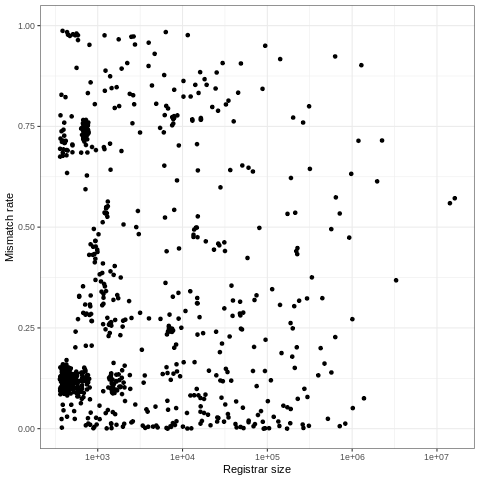

In [102]:
%%R -i top_faulty

ggplot(data=top_faulty, aes(x=total, y=update_date/total)) +
    geom_point() +
    scale_x_log10() +
    xlab("Registrar size") +
    ylab("Mismatch rate") +
    ylim(0, 1) +
    theme_bw()
    
    
ggsave('../article/figs/update_iana.pdf', units="in", width= 3.1, height=2)
last_plot()

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


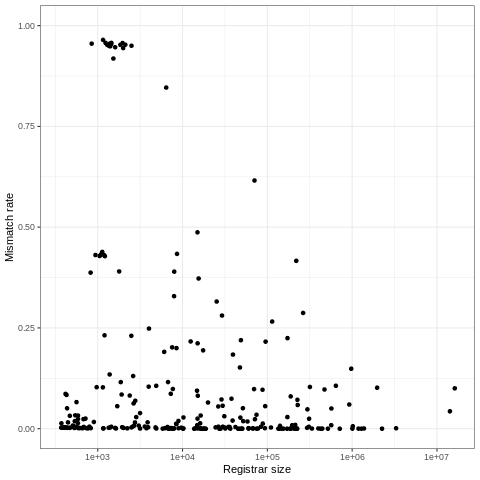

In [103]:
%%R -i top_faulty

ggplot(data=top_faulty, aes(x=total, y=creation_date/total)) +
    geom_point() +
    scale_x_log10() +
    xlab("Registrar size") +
    ylab("Mismatch rate") +
    ylim(0, 1) +
    theme_bw()
    
    
ggsave('../article/figs/creation_iana.pdf', units="in", width= 3.1, height=2)
last_plot()

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


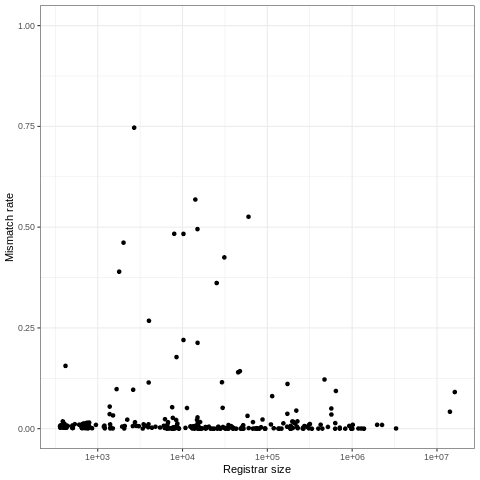

In [104]:
%%R -i top_faulty

ggplot(data=top_faulty, aes(x=total, y=expiration_date/total)) +
    geom_point() +
    scale_x_log10() +
    ylim(0, 1) +
    xlab("Registrar size") +
    ylab("Mismatch rate") +
    theme_bw()
    
    
ggsave('../article/figs/expiration_iana.pdf', units="in", width= 3.1, height=2)
last_plot()

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


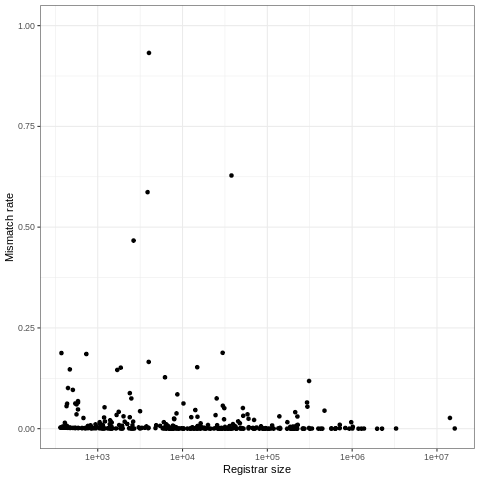

In [105]:
%%R -i top_faulty

ggplot(data=top_faulty, aes(x=total, y=nameservers/total)) +
    geom_point() +
    scale_x_log10() +
    ylim(0, 1) +
    xlab("Registrar size") +
    ylab("Mismatch rate") +
    theme_bw()
    
    
ggsave('../article/figs/nameservers_iana.pdf', units="in", width= 3.1, height=2)
last_plot()

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


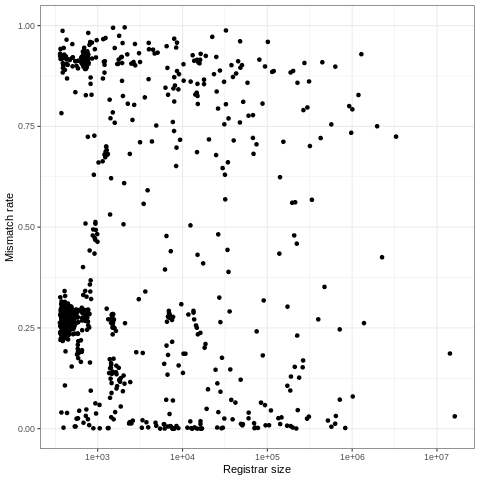

In [106]:
%%R -i top_faulty

ggplot(data=top_faulty, aes(x=total, y=emails/total)) +
    geom_point() +
    scale_x_log10() +
    ylim(0, 1) +
    xlab("Registrar size") +
    ylab("Mismatch rate") +
    theme_bw()
    
    
ggsave('../article/figs/emails_iana.pdf', units="in", width= 3.1, height=2)
last_plot()

## Update dates

In [28]:
import pandas as pd

ud_missmatches = pd.read_sql(
    "SELECT update_date.domain, r.iana_id, l.mode, update_date.left_val, r.mode, update_date.right_val "
    "FROM update_date "
    "JOIN source.parsed AS l ON update_date.left_id=l.rowid "
    "JOIN source.parsed AS r ON update_date.right_id=r.rowid "
    "WHERE l.mode != r.mode AND l.scan_depth = r.scan_depth", missmatch_db)
ud_missmatches.columns = ["domain", "iana_id", "left_mode", "left_date", "right_mode", "right_date"]

In [29]:
ud_missmatches.value_counts('iana_id')

iana_id
-1          1973192
 146        1450776
 895        1185078
 69          902589
 1923        503757
             ...   
 1557             1
 379              1
 1234             1
 1207             1
 1278552          1
Length: 1513, dtype: int64

In [30]:
ud_missmatches['left_date'] = pd.to_datetime(ud_missmatches['left_date'], errors='coerce')
ud_missmatches['right_date'] = pd.to_datetime(ud_missmatches['right_date'], errors='coerce')

In [31]:
print("To the left, only WHOIS : ", ud_missmatches['left_mode'].value_counts())
print("To the right, only RDAP : ", ud_missmatches['right_mode'].value_counts())

To the left, only WHOIS :  whois    7528734
Name: left_mode, dtype: int64
To the right, only RDAP :  rdap    7528734
Name: right_mode, dtype: int64


In [32]:
ud_missmatches['delta'] = ud_missmatches['right_date'] - ud_missmatches['left_date']
ud_missmatches['delta'] = ud_missmatches['delta'].dt.days
ud_missmatches

,domain,iana_id,left_mode,left_date,right_mode,right_date,delta
0,peracon.cz,-1,whois,2018-09-24,rdap,1970-01-01,-17798.0
1,miamijenny.com,69,whois,1970-01-01,rdap,2021-10-01,18901.0
2,champagneproductions.africa,2287,whois,2022-03-19,rdap,1970-01-01,-19070.0
3,qrticketscan.app,1345,whois,2022-05-19,rdap,2022-05-23,4.0
4,maleadeco.com,433,whois,2022-07-01,rdap,1970-01-01,-19174.0
...,...,...,...,...,...,...,...
7528729,savanhasunwines.com,-1,whois,2022-06-14,rdap,1970-01-01,-19157.0
7528730,yuanjing168.net,-1,whois,2022-12-09,rdap,1970-01-01,-19335.0
7528731,slachttechniek.com,839,whois,1970-01-01,rdap,2022-10-31,19296.0
7528732,freshfacebeautyuk.com,69,whois,1970-01-01,rdap,2022-01-25,19017.0


In [84]:
ud['domain'].nunique() / 55_000_000

0.03924696363636364

In [33]:
deltas = ud_missmatches['delta'].value_counts(normalize=True).sort_index()
deltas = deltas.to_frame(name="proportion").reset_index(names='delta')
deltas['cumulated'] = deltas['proportion'].cumsum()
deltas

,delta,proportion,cumulated
0,-20152.0,1.329714e-07,1.329714e-07
1,-20068.0,1.329714e-07,2.659429e-07
2,-19761.0,1.329714e-07,3.989143e-07
3,-19674.0,1.329714e-07,5.318858e-07
4,-19647.0,1.329714e-07,6.648572e-07
...,...,...,...
14733,19353.0,1.487950e-04,9.997387e-01
14734,19354.0,1.311098e-04,9.998698e-01
14735,19355.0,7.020892e-05,9.999400e-01
14736,19356.0,4.228492e-05,9.999823e-01


/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


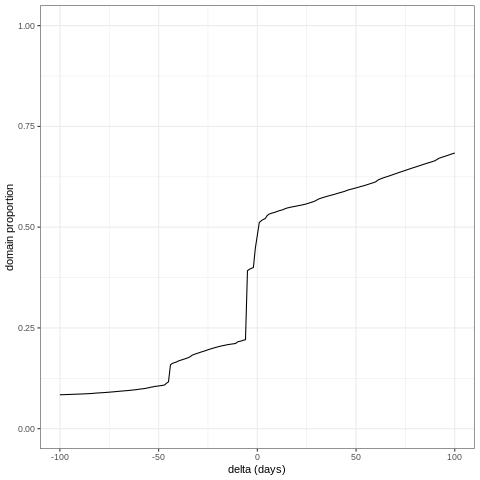

In [86]:
%%R -i deltas
ggplot(data=deltas, aes(x=delta, y=cumulated)) +
    geom_line() +
    xlim(-100, 100) +
    xlab("delta (days)") +
    ylab("domain proportion") +
    theme_bw()
    
ggsave('../article/figs/update_time.pdf', units="in", width= 3.3, height=2)
last_plot()

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


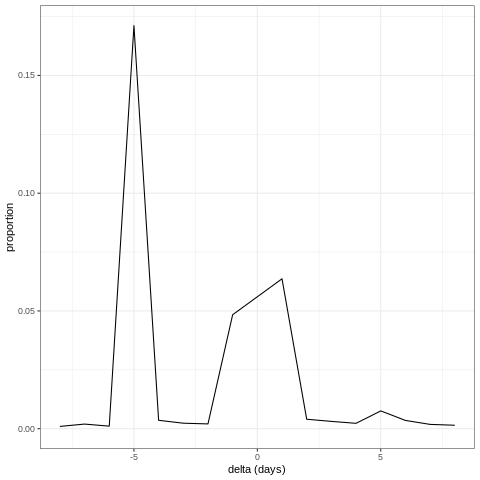

In [62]:
%%R -i deltas
ggplot(data=deltas, aes(x=delta, y=proportion)) +
    geom_line() +
    xlim(-8, 8) +
    xlab("delta (days)") +
    ylab("proportion") +
    theme_bw()
    
ggsave('../article/figs/update_time_week.pdf', units="in", width= 3.3, height=2)
last_plot()

In [73]:
deltas[abs(deltas.delta) <= 1]['proportion'].sum()

0.11207146108350488

In [93]:
ud.value_counts('iana_id').head(10)

iana_id
 895     1083913
-1        448788
 146      369093
 69        51229
 1556      32379
 151       16526
 1154      14556
 226       12670
 470       11191
 1390      10540
dtype: int64

In [34]:
top_reg = ud_missmatches[ud_missmatches.iana_id.isin([895, 146, 69, 1556, 151])][['iana_id', 'delta']]
top_reg['iana_id'] = top_reg['iana_id'].astype('str')

In [ ]:
%%R -i top_reg

ggplot(data=top_reg, aes(x=delta, after_stat(density))) +
    geom_freqpoly(aes(linetype=iana_id), binwidth=1) + 
    xlab("delta (days)") +
    ylab("density") +
    xlim(-8, +8) +
    theme_bw()
    
ggsave('../article/figs/update_time_top_5.pdf', units="in", width= 3.3, height=1.8)
last_plot()

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


## Other dates

Loading the date mismatches...

In [12]:
import pandas as pd

In [13]:
reg_missmatches = pd.read_sql(
    "SELECT creation_date.domain, r.iana_id, l.mode, creation_date.left_val, r.mode, creation_date.right_val "
    "FROM creation_date "
    "JOIN source.parsed AS l ON creation_date.left_id=l.rowid "
    "JOIN source.parsed AS r ON creation_date.right_id=r.rowid ", missmatch_db)
reg_missmatches.columns = ["domain", "iana_id", "left_mode", "left_date", "right_mode", "right_date"]

In [14]:
exp_missmatches = pd.read_sql(
    "SELECT expiration_date.domain, r.iana_id, l.mode, expiration_date.left_val, r.mode, expiration_date.right_val "
    "FROM expiration_date "
    "JOIN source.parsed AS l ON expiration_date.left_id=l.rowid "
    "JOIN source.parsed AS r ON expiration_date.right_id=r.rowid "
    "WHERE expiration_date.left_val > DATE('1970-01-01') AND  expiration_date.right_val > DATE('1970-01-01')", missmatch_db)
exp_missmatches.columns = ["domain", "iana_id", "left_mode", "left_date", "right_mode", "right_date"]

Parsing the dates

In [15]:
reg_missmatches['left_date'] = pd.to_datetime(reg_missmatches['left_date'], errors='coerce')
reg_missmatches['right_date'] = pd.to_datetime(reg_missmatches['right_date'], errors='coerce')

In [16]:
exp_missmatches['left_date'] = pd.to_datetime(exp_missmatches['left_date'], errors='coerce')
exp_missmatches['right_date'] = pd.to_datetime(exp_missmatches['right_date'], errors='coerce')

Compute the difference between the two mismatching dates

In [17]:
reg_missmatches['delta'] = (reg_missmatches['right_date'] - reg_missmatches['left_date']).dt.days
reg_missmatches

,domain,iana_id,left_mode,left_date,right_mode,right_date,delta
0,omaharoofingandgutter.com,146,whois,2015-04-10,rdap,2015-04-09,-1.0
1,f4fcz.com,81,whois,2014-06-16,whois,2014-06-15,-1.0
2,donghyn.com,244,whois,2020-12-26,whois,2020-12-25,-1.0
3,vintageheavy.com,146,whois,2016-06-13,whois,2016-06-12,-1.0
4,sdrixin.com,817,whois,2021-02-11,whois,2021-02-12,1.0
...,...,...,...,...,...,...,...
8144208,hello-cuba.net,151,rdap,2017-08-10,rdap,2002-05-17,-5564.0
8144209,otsuka.group,-1,rdap,2017-08-03,rdap,2017-08-02,-1.0
8144210,cleantouchpro.com,146,rdap,2020-04-08,rdap,2020-04-07,-1.0
8144211,piperscloset.com,895,rdap,2005-02-08,rdap,2016-11-14,4297.0


In [18]:
exp_missmatches['delta'] = (exp_missmatches['right_date'] - exp_missmatches['left_date']).dt.days
exp_missmatches

,domain,iana_id,left_mode,left_date,right_mode,right_date,delta
0,omaharoofingandgutter.com,146,whois,2023-04-10,rdap,2023-04-09,-1.0
1,holdgain.com,3759,whois,2023-09-22,whois,2023-09-23,1.0
2,marathonmg.com,146,whois,2023-07-14,rdap,2023-07-13,-1.0
3,underwaterantics.net,146,whois,2023-04-22,rdap,2023-04-21,-1.0
4,summerbreezeworld.com,146,whois,2022-12-17,rdap,2022-12-16,-1.0
...,...,...,...,...,...,...,...
4964080,xn--rdesheimer-weinbrand-pec.com,1725,rdap,2019-12-14,rdap,2023-12-14,1461.0
4964081,airomoist.com,463,rdap,2023-03-02,rdap,2023-03-01,-1.0
4964082,otsuka.group,-1,rdap,2023-08-03,rdap,2023-08-02,-1.0
4964083,cleantouchpro.com,146,rdap,2023-04-08,rdap,2023-04-07,-1.0


In [19]:
print(f"Detected {len(reg_missmatches)} mismatches on Registration Date")

Detected 8144213 mismatches on Registration Date


In [20]:
print(f"Detected {len(exp_missmatches)} mismatches on Expiration Date")

Detected 4964085 mismatches on Expiration Date


In [32]:
rm_dom = reg_missmatches['domain'].nunique()
print(f"Proportion of domains with a Registration Date mismatch: {rm_dom}, {rm_dom * 100 / 55_000_000}%")

Proportion of domains with a Registration Date mismatch: 3138024, 5.705498181818182%


In [33]:
em_dom = exp_missmatches['domain'].nunique()
print(f"Proportion of domains with an Expiration Date mismatch: {em_dom}, {em_dom *100 / 55_000_000}%")

Proportion of domains with an Expiration Date mismatch: 2424951, 4.409001818181818%


In [21]:
r_deltas = reg_missmatches['delta'].value_counts(normalize=True).sort_index()
r_deltas = r_deltas.to_frame(name="proportion").reset_index(names='delta')
r_deltas['cumulated'] = r_deltas['proportion'].cumsum()
r_deltas

,delta,proportion,cumulated
0,-87975.0,1.231084e-07,1.231084e-07
1,-87743.0,1.231084e-07,2.462168e-07
2,-86736.0,1.231084e-07,3.693252e-07
3,-82114.0,1.231084e-07,4.924336e-07
4,-80202.0,1.231084e-07,6.155420e-07
...,...,...,...
17892,88618.0,2.462168e-07,9.999990e-01
17893,89039.0,2.462168e-07,9.999993e-01
17894,90243.0,2.462168e-07,9.999995e-01
17895,90548.0,2.462168e-07,9.999998e-01


In [22]:
e_deltas = exp_missmatches['delta'].value_counts(normalize=True).sort_index()
e_deltas = e_deltas.to_frame(name="proportion").reset_index(names='delta')
e_deltas['cumulated'] = e_deltas['proportion'].cumsum()
e_deltas

,delta,proportion,cumulated
0,-86179.0,2.016313e-07,2.016313e-07
1,-61710.0,2.016313e-07,4.032626e-07
2,-58703.0,2.016313e-07,6.048938e-07
3,-54046.0,2.016313e-07,8.065251e-07
4,-44779.0,2.016313e-07,1.008156e-06
...,...,...,...
1023,81115.0,4.032626e-07,9.999986e-01
1024,82314.0,4.032626e-07,9.999990e-01
1025,83301.0,4.032626e-07,9.999994e-01
1026,85481.0,4.032626e-07,9.999998e-01


In [23]:
e_deltas['event'] = "Expiration"
r_deltas['event'] = "Registration"
deltas = pd.concat([e_deltas, r_deltas])
deltas

,delta,proportion,cumulated,event
0,-86179.0,2.016313e-07,2.016313e-07,Expiration
1,-61710.0,2.016313e-07,4.032626e-07,Expiration
2,-58703.0,2.016313e-07,6.048938e-07,Expiration
3,-54046.0,2.016313e-07,8.065251e-07,Expiration
4,-44779.0,2.016313e-07,1.008156e-06,Expiration
...,...,...,...,...
17892,88618.0,2.462168e-07,9.999990e-01,Registration
17893,89039.0,2.462168e-07,9.999993e-01,Registration
17894,90243.0,2.462168e-07,9.999995e-01,Registration
17895,90548.0,2.462168e-07,9.999998e-01,Registration


/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


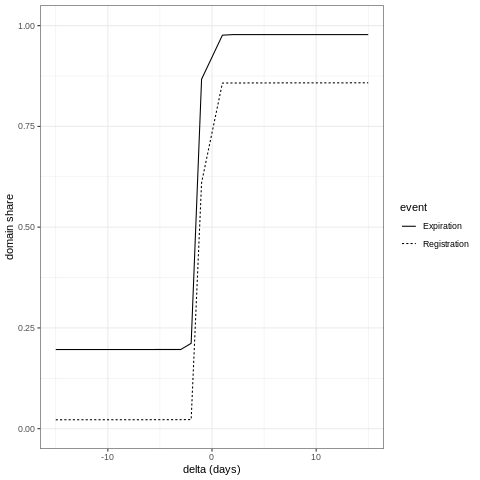

In [27]:
%%R -i deltas
ggplot(data=deltas, aes(x=delta, y=cumulated, linetype=event)) +
    geom_line() +
    xlim(-15, 15) +
    xlab("delta (days)") +
    ylab("domain share") +
    theme_bw()
    
ggsave('../article/figs/creation_expiration_time.pdf', units="in", width= 3.3, height=1.5)
last_plot()

In [40]:
print(e_deltas[abs(e_deltas.delta) < 370]['proportion'].sum() )
print(r_deltas[abs(r_deltas.delta) < 10]['proportion'].sum() )

0.9780338853460031
0.8357530701390459


### Nameservers

Number of unique domains with a NS missmatch

In [6]:
missmatch_cur.execute("SELECT COUNT(DISTINCT(domain)) FROM nameservers")
missmatch_cur.fetchall()

[(576204,)]

The different missmatching possibilities:

- $Left \subset Right$ : Left is a subset of Right
- $Left \supset Right$ : Right is a subset of Left
- $Left \cap Right \neq \emptyset$ : Left and Right do not match but they have servers in common
- $Left \cap Right = \emptyset$ : Left and Right have nothing in common

In [6]:
import pandas as pd

missmatch_cur.execute("SELECT nameservers.domain, l.mode, nameservers.left_val, r.mode, nameservers.right_val "
                             "FROM nameservers "
                             "JOIN source.parsed AS l ON nameservers.left_id=l.rowid "
                             "JOIN source.parsed AS r ON nameservers.right_id=r.rowid")

ns_missmatches = pd.DataFrame(missmatch_cur.fetchall(), columns=['domain', 'left_mode', 'left_ns', 'right_mode', 'right_ns'])

In [7]:
def missmatch_case(ns1, ns2):
    ns1 = set(ns1.split(','))
    ns2 = set(ns2.split(','))
    
    if ns1 == ns2:
        # This should not happend, but just in case...
        return "Equal"
    elif ns1.issubset(ns2):
        return "LeftSubRight"
    elif ns2.issubset(ns1):
        return "RightSubLeft"
    elif not ns1.isdisjoint(ns2):
        return "Intersect"
    else:
        return "Disjoint"
    

ns_missmatches['match_case'] = ns_missmatches.apply(lambda row: missmatch_case(row['left_ns'], row['right_ns']), axis=1)

In [21]:
by_case = ns_missmatches.value_counts('match_case')
by_case['Total'] = by_case.sum()
by_case['Inclusion'] = by_case['RightSubLeft'] + by_case['LeftSubRight']
print(by_case)
print(by_case * 100 / by_case['Total'])

match_case
Disjoint         680942
RightSubLeft     274864
Intersect         48693
LeftSubRight      39769
Total           1044268
Inclusion        314633
dtype: int64
match_case
Disjoint         65.207590
RightSubLeft     26.321213
Intersect         4.662883
LeftSubRight      3.808314
Total           100.000000
Inclusion        30.129526
dtype: float64


In [23]:
by_case = ns_missmatches.groupby('match_case')['domain'].nunique()
by_case['Total'] = ns_missmatches['domain'].nunique()
by_case['Inclusion'] = by_case['RightSubLeft'] + by_case['LeftSubRight']
print(by_case)
print(by_case * 100 / by_case['Total'])

match_case
Disjoint        343994
Intersect        23934
LeftSubRight     24928
RightSubLeft    199905
Total           573790
Inclusion       224833
Name: domain, dtype: int64
match_case
Disjoint         59.951202
Intersect         4.171212
LeftSubRight      4.344447
RightSubLeft     34.839401
Total           100.000000
Inclusion        39.183848
Name: domain, dtype: float64


In [8]:
by_mode = ns_missmatches.value_counts(['left_mode', 'right_mode'])
by_mode

left_mode  right_mode
whois      rdap          705956
rdap       rdap          177801
whois      whois         160511
dtype: int64

In [9]:
by_mode * 100 / by_mode.sum()

left_mode  right_mode
whois      rdap          67.602952
rdap       rdap          17.026376
whois      whois         15.370671
dtype: float64

### Mails

In [4]:
import pandas as pd

#missmatch_cur.execute("SELECT emails.domain, l.mode, emails.left_val, r.mode, emails.right_val "
#                             "FROM emails "
#                             "JOIN source.parsed AS l ON emails.left_id=l.rowid "
#                             "JOIN source.parsed AS r ON emails.right_id=r.rowid")

#mail_missmatches = pd.DataFrame(missmatch_cur.fetchall(), columns=['domain', 'left_mode', 'left_mail', 'right_mode', 'right_mail'])
mail_missmatches = pd.read_csv('../data/scans/22_12_05/mails.csv', sep='|', names=['domain', 'left_mode', 'left_mail', 'right_mode', 'right_mail'],
                              dtype={'domain': 'str', 'left_mode': 'str', 'left_mail':'str', 'right_mode':'str', 'right_mail':'str'})
mail_missmatches.head()

,domain,left_mode,left_mail,right_mode,right_mail
0,csprogresso.com,whois,abuse@gmo.jp,whois,"abuse@gmo.jp,reg-domain@nttbiz.jp"
1,organicbeautyvixen.com,whois,support@namebright.com,whois,"abuse@namebright.com,domains@hugedomains.com"
2,hmznz.com,whois,rtr-security-threats@realtimeregister.com,whois,complaint@gname.com
3,dhanishthanidhi.com,whois,abuse-contact@publicdomainregistry.com,whois,"abuse-contact@publicdomainregistry.com,akatiya..."
4,dhanishthanidhi.com,whois,abuse-contact@publicdomainregistry.com,whois,"abuse-contact@publicdomainregistry.com,akatiya..."


In [5]:
mail_missmatches.fillna('', inplace=True)

In [6]:
def missmatch_case(m1, m2, only_domain=False):
    if only_domain:
        # Remove the part before the @, to avoid detecting the "hidden for privacy" proxies
        m1 = set(m.split('@')[1] for m in m1.split(',') if '@' in m)
        m2 = set(m.split('@')[1] for m in m2.split(',') if '@' in m)
    else:
        m1 = set(m for m in m1.split(',') if '@' in m)
        m2 = set(m for m in m2.split(',') if '@' in m)
    
    
    if m1 == m2:
        # This should not happend, but just in case...
        return "Equal"
    elif m1.issubset(m2) or m2.issubset(m1):
        return "Inclusion"
    elif not m1.isdisjoint(m2):
        return "Intersect"
    else:
        return "Disjoint"


mail_missmatches['match_case'] = mail_missmatches.apply(lambda row: missmatch_case(row['left_mail'], row['right_mail']), axis=1)
mail_missmatches['domain_match_case'] = mail_missmatches.apply(lambda row: missmatch_case(row['left_mail'], row['right_mail'], only_domain=True), axis=1)

mail_missmatches.head()

,domain,left_mode,left_mail,right_mode,right_mail,match_case,domain_match_case
0,csprogresso.com,whois,abuse@gmo.jp,whois,"abuse@gmo.jp,reg-domain@nttbiz.jp",Inclusion,Inclusion
1,organicbeautyvixen.com,whois,support@namebright.com,whois,"abuse@namebright.com,domains@hugedomains.com",Disjoint,Inclusion
2,hmznz.com,whois,rtr-security-threats@realtimeregister.com,whois,complaint@gname.com,Disjoint,Disjoint
3,dhanishthanidhi.com,whois,abuse-contact@publicdomainregistry.com,whois,"abuse-contact@publicdomainregistry.com,akatiya...",Inclusion,Inclusion
4,dhanishthanidhi.com,whois,abuse-contact@publicdomainregistry.com,whois,"abuse-contact@publicdomainregistry.com,akatiya...",Inclusion,Inclusion


In [7]:
print("Counting the different cases of intersection")
cases = mail_missmatches.groupby('match_case')['domain'].nunique()
cases['Total'] = mail_missmatches['domain'].nunique()
print(cases)
print(cases * 100 / cases['Total'])

Counting the different cases of intersection
match_case
Disjoint      4924766
Equal               3
Inclusion    15124483
Intersect      557491
Total        18958820
Name: domain, dtype: int64
match_case
Disjoint      25.976121
Equal          0.000016
Inclusion     79.775445
Intersect      2.940536
Total        100.000000
Name: domain, dtype: float64


In [8]:
cases = mail_missmatches.groupby('domain_match_case')['domain'].nunique()
cases['Total'] = mail_missmatches['domain'].nunique()
print(cases)
print(cases*100/cases['Total'])

domain_match_case
Disjoint      2019860
Equal         4058613
Inclusion    14543230
Intersect      232488
Total        18958820
Name: domain, dtype: int64
domain_match_case
Disjoint      10.653933
Equal         21.407519
Inclusion     76.709574
Intersect      1.226279
Total        100.000000
Name: domain, dtype: float64


In [145]:
2_019_860 * 100 / 55_000_000

3.6724727272727273

In [21]:
mail_missmatches[mail_missmatches.match_case == "Disjoint"].value_counts(['left_mode', 'right_mode'], normalize=True)

left_mode  right_mode
whois      rdap          0.518898
           whois         0.279537
rdap       rdap          0.201565
dtype: float64

### Iana ID and Registrar

In [43]:
import pandas as pd

iana_missmatches = pd.read_sql(
    "SELECT iana_id.domain, l.mode, iana_id.left_val, r.mode, iana_id.right_val "
    "FROM iana_id "
    "JOIN source.parsed AS l ON iana_id.left_id=l.rowid "
    "JOIN source.parsed AS r ON iana_id.right_id=r.rowid ", missmatch_db)
iana_missmatches.columns = ["domain", "left_mode", "left_iana", "right_mode", "right_iana"]
iana_missmatches

,domain,left_mode,left_id,right_mode,right_id
0,conversationmusic.com,whois,1441,whois,3354
1,leapcent.com,whois,1915,rdap,1556
2,conversationmusic.com,whois,3354,rdap,1441
3,ybzbqo4.cyou,whois,1915,rdap,1556
4,ybzbqo4.cyou,whois,1915,rdap,1556
...,...,...,...,...,...
264579,ridewihgps.com,rdap,1915,rdap,1556
264580,ayden.vip,rdap,1915,rdap,1556
264581,tujieguo.com,rdap,1915,rdap,1556
264582,xcrgjs.cyou,rdap,1915,rdap,1556


In [48]:
iana_dom = iana_missmatches['domain'].nunique()
print(f"IANA ID mismatches : {iana_dom} domains ({iana_dom *100/55_000_000 }%)")  

IANA ID mismatches : 106813 domains (0.19420545454545454%)


In [45]:
iana_missmatches.value_counts(['left_mode', 'right_mode'])

left_mode  right_mode
whois      rdap          157862
rdap       rdap          101662
whois      whois           5060
dtype: int64

In [55]:
# To find which iana ids mismatch, sort the values before
iana_missmatches['min_iana'] = iana_missmatches[['left_iana', 'right_iana']].min(axis=1)
iana_missmatches['max_iana'] = iana_missmatches[['left_iana', 'right_iana']].max(axis=1)

In [56]:
iana_missmatches.value_counts(['min_iana', 'max_iana'], normalize=True)

min_iana  max_iana
1556      1915        0.912799
3951      5555555     0.042017
1556      3824        0.023641
600       735         0.004936
1564      2487        0.002653
                        ...   
292       299         0.000004
299       433         0.000004
          1052        0.000004
          1387        0.000004
1441      3483        0.000004
Length: 307, dtype: float64

# Who is Right ?

## Nameservers

`ns_rescan.db` tables :

Table `parsed` contains the collected and parsed WHOIS and RDAP entries :
```sqlite
domain|TEXT
mode|TEXT
scan_id|TEXT
scan_depth|INTEGER
nameservers|TEXT
```

Table `missmatch` contains the missmatches between entries from a same domain :
```sqlite
domain|TEXT
left_id|INTEGER
right_id|INTEGER
left_ns|TEXT
right_ns|TEXT
```
With `left_id` and `right_id` being the row ids of the entries in the `parsed` table

Table `dns` contains the NS entries of the domain, collected at registry level in the DNS
```sqlite
domain|TEXT
status|TEXT
nameservers|TEXT
```

In [30]:
import sqlite3

ns_db_path = "../data/ns_rescan_2/ns_rescan.db"
ns_db = sqlite3.connect(ns_db_path, isolation_level="EXCLUSIVE")
ns_cur = ns_db.cursor()

In [78]:
import pandas as pd
ns_missmatches = pd.read_sql("SELECT missmatch.domain, dns.nameservers, l.mode, l.scan_depth, missmatch.left_ns, r.mode, r.scan_depth, missmatch.right_ns "
                             "FROM missmatch "
                             "JOIN dns ON missmatch.domain = dns.domain "
                             "JOIN parsed AS l ON missmatch.left_id=l.rowid "
                             "JOIN parsed AS r ON missmatch.right_id=r.rowid "
                             "WHERE dns.status = 'NOERROR'", ns_db)
ns_missmatches.columns = ["domain", "dns_ns", "left_mode", "left_depth", "left_ns", "right_mode", "right_depth", "right_ns"]


In [95]:
# Depth of -1 means that it was the last recursive call. Replace it by 5 as no depth go bigger than 1, and it makes comparison easier
ns_missmatches = ns_missmatches.applymap(lambda v: 5 if v == -1 else v)

In [79]:
def who_is_right(left, right, dns):
    left = set(left.split(','))
    right = set(right.split(','))
    dns = set(dns.split(','))
    if left == right:
        return "No differences"
    if left == dns:
        return "Perfect Left"
    elif right == dns:
        return "Perfect Right"
    else:
        d_in_l = dns.issubset(left) or left.issubset(dns)
        d_in_r = dns.issubset(right) or right.issubset(dns)
        
        if d_in_l and d_in_r:
            return "Common Subset"
        elif d_in_l:
            return "Subset Left"
        elif d_in_r:
            return "Subset Right"
        else:
            d_int_l = not dns.isdisjoint(left)
            d_int_r = not dns.isdisjoint(right)
            
            if d_int_l and d_int_r:
                return "Common Intersection"
            elif d_int_l:
                return "Intersection Left"
            elif d_int_r:
                return "Intersection Right"
            else:
                return "Disjoint"
            

ns_missmatches['who_is_right'] = ns_missmatches.apply(lambda row: who_is_right(row['left_ns'], row['right_ns'], row['dns_ns']), axis=1)
ns_missmatches.head()

,domain,dns_ns,left_mode,left_depth,left_ns,right_mode,right_depth,right_ns,who_is_right
0,hinescounsel.com,"ns-unused-9078.fastdomain.com,ns-unused-9079.f...",rdap,0,"ns-unused-9078.fastdomain.com,ns-unused-9079.f...",rdap,-1,"ns1.1marketinghost.com,ns2.1marketinghost.com",Perfect Left
1,hospicandelustraznych.cz,"ns.forpsi.cz,ns.forpsi.it,ns.forpsi.net",rdap,-1,"ns.forpsi.cz,ns.forpsi.it,ns.forpsi.net",whois,-1,",ns.forpsi.cz,ns.forpsi.it,ns.forpsi.net",Perfect Left
2,zeiner.no,"ns01.no.brand.one.com,ns02.no.brand.one.com",rdap,-1,"ns01.no.brand.one.com,ns02.no.brand.one.com",whois,-1,"nsno2078h-norid,nsno2079h-norid",Perfect Left
3,etx.studio,"ns-1031.awsdns-00.org,ns-1636.awsdns-12.co.uk,...",rdap,0,"ns-1031.awsdns-00.org,ns-1636.awsdns-12.co.uk,...",rdap,-1,"ns-1031.awsdns-00.org,ns-314.awsdns-39.com,ns-...",Perfect Left
4,sangocongnghiepvietnam.com,"ns1.dotvndns.vn,ns2.dotvndns.vn,nsbak.dotvndns...",rdap,0,"ns1.dotvndns.vn,ns2.dotvndns.vn,nsbak.dotvndns...",whois,-1,"ns1.dotvndns.vn,ns2.dotvndns.vndnssec:unsigned...",Perfect Left


In [80]:
ns_missmatches.value_counts(['left_mode', 'right_mode'], normalize=True) * 100

left_mode  right_mode
rdap       whois         74.851899
whois      whois         14.783191
rdap       rdap          10.364910
dtype: float64

In [81]:
ns_missmatches.value_counts('who_is_right', normalize=True) * 100

who_is_right
Perfect Left           76.482518
Perfect Right          22.901278
No differences          0.497205
Disjoint                0.063121
Subset Left             0.022937
Subset Right            0.022247
Common Subset           0.004312
Common Intersection     0.003104
Intersection Right      0.002242
Intersection Left       0.001035
dtype: float64

In [82]:
print("Total number of entries : ", ns_missmatches['domain'].count())
print("Number of unique domains : ", ns_missmatches['domain'].nunique())

Total number of entries :  579841
Number of unique domains :  365521


Now that we know which side is right, now lets translate it to WHOIS or RDAP.
This will only make sense when the missmatch is between two different modes

In [84]:
def valid_mode(row):
        if row['who_is_right'] == "Perfect Left":
            return row['left_mode']
        elif row['who_is_right'] == "Perfect Right":
            return row['right_mode']
        else:
            return "None"

ns_missmatches['valid_mode'] = ns_missmatches.apply(valid_mode, axis=1) 

In [86]:
ns_missmatches[ns_missmatches.left_mode != ns_missmatches.right_mode].value_counts('valid_mode', normalize=True)*100

valid_mode
rdap     78.482427
whois    20.961149
None      0.556423
dtype: float64

For the case where both modes are the same, we want to know which depth was right

In [98]:
def thin_thick(valid, other):
    if valid > other:
        return "Thick"
    elif valid < other:
        return "Thin"
    else:
        # Should not happend
        return "Same"

def valid_depth(row):
    if row['who_is_right'] == "Perfect Left":
        return thin_thick(row['left_depth'], row['right_depth'])
    elif row['who_is_right'] == "Perfect Right":
        return thin_thick(row['right_depth'], row['left_depth'])
    else:
        return "None"

ns_missmatches[ns_missmatches.left_mode == ns_missmatches.right_mode].apply(valid_depth, axis=1).value_counts(normalize=True)*100

Thin     99.197635
None      0.794135
Thick     0.008229
dtype: float64

## IANA ID & Registrars

Find the canonical name of the domains when there is a mismatch

In [137]:
missmatch_cur.execute("UPDATE registrar SET "
            "left_cname = (SELECT registrar_cname.cname FROM registrar_cname WHERE registrar.left_name = registrar_cname.name), "
            "right_cname = (SELECT registrar_cname.cname FROM registrar_cname WHERE registrar.right_name = registrar_cname.name) "
            "WHERE left_cname IS NULL OR right_cname IS NULL")
missmatch_db.commit()

In [111]:
missmatch_cur.execute("DELETE FROM registrar WHERE left_cname = right_cname")
missmatch_db.commit()

In [113]:
del_count = 37754148
rem_count = 26375400
print(f"canonical name mapping deleted {100 * del_count / (del_count + rem_count)}% of entries")

canonical name mapping deleted 58.871688913198014% of entries


In [130]:
missmatch_cur.execute("SELECT registrar.domain, l.mode, left_iana, left_cname, r.mode, right_iana, right_cname "
                        "FROM registrar "
                        "JOIN source.parsed AS l ON registrar.left_rowid=l.rowid "
                        "JOIN source.parsed AS r ON registrar.right_rowid=r.rowid ")
registrar = pd.DataFrame(missmatch_cur.fetchall(), columns=['domain', 'left_mode', 'left_iana', 'left_cname', 'right_mode', 'right_iana', 'right_cname'])
registrar

,domain,left_mode,left_iana,left_cname,right_mode,right_iana,right_cname
0,cafelifeskills.net,whois,886,"Domain.com, LLC",whois,-1,None
1,brookieandreese.com,whois,69,Tucows Domains Inc.,whois,-1,None
2,hmshb.no,whois,-1,None,rdap,-1,Domeneshop AS dba domainnameshop.com
3,northcheshirecouriers.uk,whois,-1,None,rdap,-1,None
4,revolutionstudios.com,whois,9,"Register.com, Inc.",rdap,-1,None
...,...,...,...,...,...,...,...
26375395,tonnevoldskogen.com,rdap,-1,None,rdap,269,Key-Systems GmbH
26375396,youle810.com,rdap,-1,None,rdap,625,"Name.com, Inc."
26375397,barrymccockiner.com,rdap,1479,"NameSilo, LLC",rdap,-1,None
26375398,hailong0317.com,rdap,-1,None,rdap,1479,"NameSilo, LLC"


In [133]:
total = registrar['domain'].nunique()

In [134]:
registrar.groupby(['left_mode', 'right_mode'])['domain'].nunique() / total

left_mode  right_mode
rdap       rdap          0.483258
whois      rdap          0.963385
           whois         0.484011
Name: domain, dtype: float64

In [123]:
both_na = registrar[registrar.left_cname.isna() & registrar.right_cname.isna()]['domain'].nunique()
one_na = registrar[registrar.left_cname.isna() ^ registrar.right_cname.isna()]['domain'].nunique()
none_na = registrar[~registrar.left_cname.isna() & ~registrar.right_cname.isna()]['domain'].nunique()
total = registrar['domain'].nunique()

In [124]:
print(both_na*100/total)
print(one_na*100/total)
print(none_na*100/total)

2.1299392615846586
96.91313875808518
0.9569219803301562


In [136]:
registrar[registrar.left_iana == registrar.right_iana]['domain'].nunique() / total

0.11715750147518658

# Missing data stats

## Creation date

In [20]:
parsed_cur.execute("SELECT domain, mode FROM parsed_2 WHERE creation_date IS NULL")
creation_missing = pd.DataFrame(parsed_cur.fetchall(), columns=["domain", "mode"])
print(len(creation_missing))

OperationalError: no such column: mode

In [4]:
print("Creation date entry error rate : ", 100*len(creation_missing)/total_entries)
print("Creation date domain error rate : ", 100*len(set(creation_missing))/total_domains)

Creation date entry error rate :  0.7767815859148003
Creation date domain error rate :  2.2007052566113927


## Expiration date

In [5]:
parsed_cur.execute("SELECT domain FROM parsed_2 WHERE expiration_date IS NULL")
expiration_missing = parsed_cur.fetchall()
print(len(expiration_missing))

1614597


In [6]:
print("Expiration date entry error rate : ", 100*len(expiration_missing)/total_entries)
print("Expiration date domain error rate : ", 100*len(set(expiration_missing))/total_domains)

Expiration date entry error rate :  1.034422957651372
Expiration date domain error rate :  2.6805523419739896


## Nameservers

In [14]:
parsed_cur.execute("SELECT domain FROM parsed_2 WHERE nameservers == ''")
ns_missing = parsed_cur.fetchall()
print(len(ns_missing))

4980159


In [15]:
print("NS entry error rate : ", 100*len(ns_missing)/total_entries)
print("NS domain error rate : ", 100*len(set(ns_missing))/total_domains)

NS entry error rate :  3.1906356833030776
NS domain error rate :  6.575470999328815


## IANA ID

In [16]:
parsed_cur.execute("SELECT domain FROM parsed_2 WHERE iana_id IS NULL")
iana_missing = parsed_cur.fetchall()
print(len(iana_missing))

9269912


In [17]:
print("IANA entry error rate : ", 100*len(iana_missing)/total_entries)
print("IANA domain error rate : ", 100*len(set(iana_missing))/total_domains)

IANA entry error rate :  5.938949340428568
IANA domain error rate :  13.663345280145707


## Emails
For emails, we count the number of entries where we found no emails in the whole entry

In [18]:
parsed_cur.execute("SELECT domain FROM parsed_2 WHERE emails == ''")
emails_missing = parsed_cur.fetchall()
print(len(emails_missing))

12274448


In [19]:
print("Mail entry error rate : ", 100*len(emails_missing)/total_entries)
print("Mail domain error rate : ", 100*len(set(emails_missing))/total_domains)

Mail entry error rate :  7.86386374042437
Mail domain error rate :  14.783815409252167
